In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [7]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [8]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [9]:
X_test.head()

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [10]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [11]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,20.0
493,71.0,49.5042,71.0
527,NaN,221.7792,32.0


C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\2315829164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label = 'Original', hist = False)
C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\2315829164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

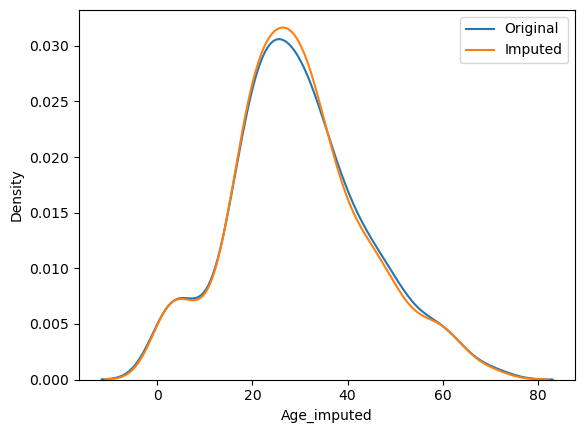

In [14]:
sns.distplot(X_train['Age'], label = 'Original', hist = False)
sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist = False)

plt.legend()
plt.show()

In [15]:
print(f"Original variable variance: {X_train['Age'].var()}")
print(f"variance after random imputation: {X_train['Age_imputed'].var()}")

Original variable variance: 204.3495133904614
variance after random imputation: 198.3985928094233


In [16]:
X_train[['Fare', "Age", 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.580101
Age,71.512440,204.349513,204.349513
Age_imputed,53.580101,204.349513,198.398593


<Axes: >

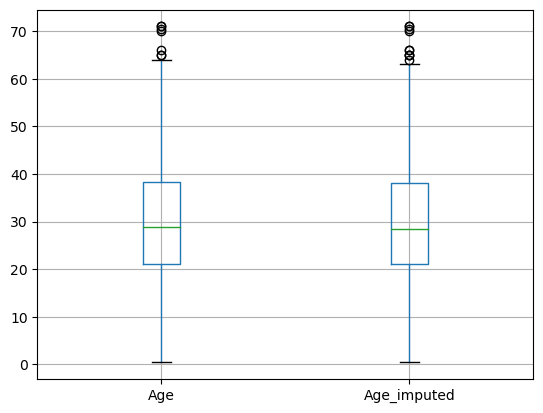

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

# Random imputation for categorical data

In [18]:
data = pd.read_csv("train_housing.csv", usecols = ['GarageQual', 'FireplaceQu', "SalePrice"])

In [19]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [22]:
X = data
y = data['SalePrice']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\569013964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\569013964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\569013964.py:5: SettingWithCopyWarning: 
A 

In [29]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
     ],
axis = 1)

temp.columns = ['Original', 'Imputed']

In [30]:
temp

,Original,Imputed
TA,0.951043,0.949486
Fa,0.037171,0.037671
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [31]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(df)
     ],
axis = 1)

temp.columns = ['Original', 'Imputed']

In [32]:
temp

,Original,Imputed
Gd,0.494272,0.647587
TA,0.412439,0.539843
Fa,0.040917,0.053872
Po,0.027823,0.037037
Ex,0.024550,0.032548


C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\890929193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist = False, label = category)
C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\890929193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

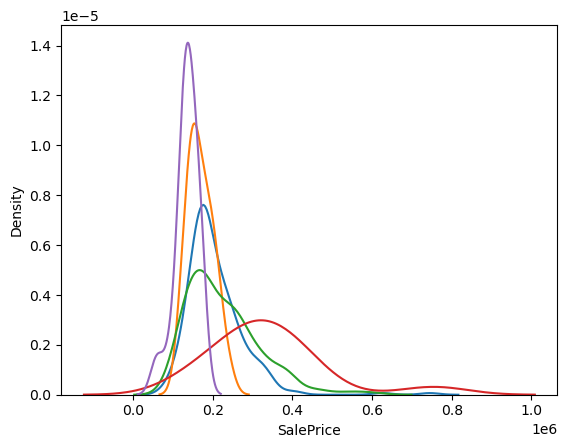

In [33]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist = False, label = category)
    
plt.show()

C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\2003460555.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist = False, label = category)
C:\Users\Santosh\AppData\Local\Temp\ipykernel_3632\2003460555.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

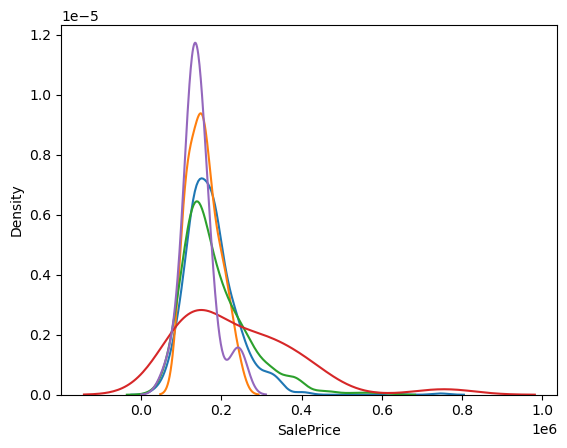

In [34]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist = False, label = category)
    
plt.show()